<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Nets

##Linear data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/linear/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df

In [ ]:
train_df.head()

,x,y,color
0,3.505082,2.208255,1.0
1,3.912028,3.061294,1.0
2,0.102991,1.099949,0.0
3,4.156436,3.284223,1.0
4,4.099440,3.435531,1.0


In [ ]:
train_df.x.values[0:5] #poprzez x.values uzyskuję typ numpy.ndarray

array([3.50508177, 3.9120278 , 0.10299125, 4.1564359 , 4.09944049])

###Model

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(4, input_shape = (2,), activation = 'relu'), #4 neurony w wartstwie ukrytej
     keras.layers.Dense(2, activation = 'sigmoid')] #Dwa neurony warstwy wyjściowej (kolor = 1 lub = 0)
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'x')
model.fit(x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 2s 1ms/step - loss: 0.3944 - accuracy: 0.8700
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0656 - accuracy: 1.0000
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 1.0000


###Evaluation on the test data

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/linear/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

In [ ]:
model.evaluate(test_x, test_df.color.values)

32/32 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000


[0.004632028751075268, 1.0]

##Quadratic data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/quadratic/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

###Model

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(32, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dropout(0.2), #Wyłączanie 20% neuronów z warstwy ukrytej
     keras.layers.Dense(2, activation = 'sigmoid')] #Dwa neurony warstwy wyjściowej (kolor = 1 lub = 0)
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6684 - accuracy: 0.6332
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5041 - accuracy: 0.7523
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4177 - accuracy: 0.8188
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8475
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3160 - accuracy: 0.8840


###Evaluation

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/quadratic/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

model.evaluate(test_x, test_df.color.values)

32/32 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9480


[0.24766743183135986, 0.9480000138282776]

##Clusters classifying

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/clusters/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

In [ ]:
train_df.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


###Mapping the color with a dict

In [ ]:
keys = (train_df['color'].unique())
print(keys)

['red' 'blue' 'green' 'teal' 'orange' 'purple']


In [ ]:
values = list(range(0, len(keys)))
colors = dict(zip(keys, values))  #=> {'a': 1, 'b': 2}
colors

{'red': 0, 'blue': 1, 'green': 2, 'teal': 3, 'orange': 4, 'purple': 5}

In [ ]:
train_df['color'] = train_df['color'].map(colors)

In [ ]:
train_df 

,x,y,color
0,0.129270,1.979720,0
1,-0.380831,1.693519,0
2,0.718693,1.791793,0
3,0.722922,0.620655,0
4,-0.432689,0.541550,0
...,...,...,...
5995,0.973060,3.174358,5
5996,-0.894536,2.964002,5
5997,0.426649,3.511122,5
5998,-0.414503,2.712347,5


###2 different ways to map the color columns

In [ ]:
# train_df['color'] = pd.factorize(train_df.color)[0]

In [ ]:
# train_df['color'] = train_df.color.apply(lambda x: colors[x])

###Model

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(32, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dense(32, activation = 'relu'),
     keras.layers.Dense(6, activation = 'sigmoid')] #6 etykiet klustrów
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 3s 2ms/step - loss: 0.6075 - accuracy: 0.7722
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1707 - accuracy: 0.9477
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9622
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1025 - accuracy: 0.9655
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9677


###Evaluation

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/clusters/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))
test_df['color'] = test_df['color'].map(colors)

model.evaluate(test_x, test_df.color.values)

38/38 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9542


[0.10480944067239761, 0.9541666507720947]

###Prediction

In [ ]:
model.predict(np.array([[0,3]]))

1/1 [==============================] - 0s 55ms/step


array([[1.1330723e-03, 6.4696915e-02, 1.1424996e-08, 2.5279614e-09,
        1.2059400e-05, 9.9852628e-01]], dtype=float32)

In [ ]:
print(f'Prediction: ', np.round(model.predict(np.array([[0,3]]))))

1/1 [==============================] - 0s 21ms/step
Prediction:  [[0. 0. 0. 0. 0. 1.]]


##Complex case classification

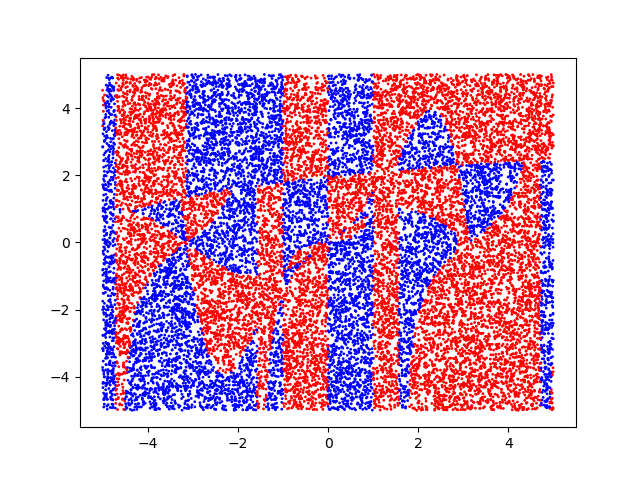

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/complex/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

In [ ]:
train_df

,x,y,color
0,-3.529067,-1.072599,1.0
1,-3.739934,-2.102559,1.0
2,-2.187437,-4.475526,1.0
3,-2.291865,-0.020283,1.0
4,3.809626,-4.677126,0.0
...,...,...,...
19995,0.987387,-1.242272,1.0
19996,-0.096193,3.835872,0.0
19997,-2.881219,-2.430065,1.0
19998,-0.035318,0.708324,1.0


In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(256, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dropout(0.4),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dense(2, activation = 'sigmoid')] #2 etykiety klustrów
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5000/5000 [==============================] - 11s 2ms/step - loss: 0.6193 - accuracy: 0.6492
Epoch 2/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5497 - accuracy: 0.7265
Epoch 3/5
5000/5000 [==============================] - 12s 2ms/step - loss: 0.5164 - accuracy: 0.7444
Epoch 4/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4931 - accuracy: 0.7608
Epoch 5/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4807 - accuracy: 0.7683


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/complex/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

model.evaluate(test_x, test_df.color.values)

157/157 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7978


[0.4251158833503723, 0.7978000044822693]

#Examples for neural networks

In [1]:
pip install -q tensorflow tensorflow-datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

##Tensorflow datasets

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

##Information about the dataset

In [4]:
builder = tfds.builder('rock_paper_scissors')
builder.info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='~/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    

##Preparation of the rock, paper, scissors data

In [5]:
tfds.disable_progress_bar() #Wyłączenie paska postępu ładowania danych

In [6]:
ds_train = tfds.load(name = 'rock_paper_scissors', split = 'train')
ds_test = tfds.load(name = 'rock_paper_scissors', split = 'test')

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


##Examples

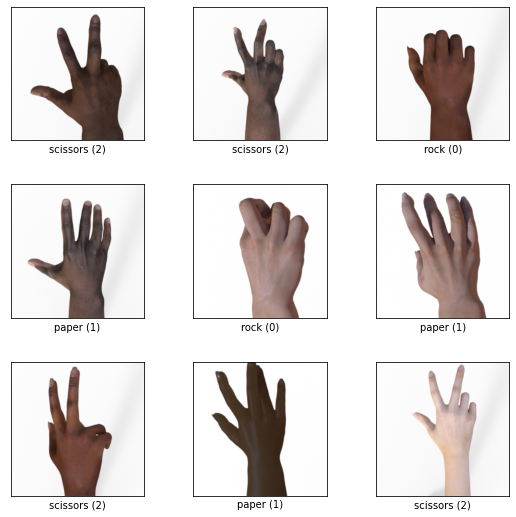

In [7]:
info = builder.info
fig = tfds.show_examples(ds_train, info)

###Converting tensorflow object to numpy format

In [8]:
train_images = np.array([example['image'].numpy() for example in ds_train])

In [9]:
type(train_images[0])

numpy.ndarray

In [10]:
train_images.shape #Obrazy RGB

(2520, 300, 300, 3)

###Grayscale

In [11]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])

train_labels = np.array([example['label'] for example in ds_train])
test_labels = np.array([example['label'] for example in ds_test])

In [12]:
train_images.shape #Obrazy w odcieniach szarości

(2520, 300, 300)

In [13]:
test_images.shape

(372, 300, 300)

###Reshape -> additional 'axis' for grayscale

In [14]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images.dtype

dtype('uint8')

###Change of the data type uint8 -> float and normalization to get a better performance of the classification

In [15]:
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.astype('float32')
test_images /= 255

In [16]:
train_images.dtype

dtype('float32')

In [17]:
train_images[0][0][0]

array([0.99607843], dtype=float32)

##Training the network

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 22s 257ms/step - loss: 23.3742 - accuracy: 0.4071
Epoch 2/5
79/79 [==============================] - 28s 355ms/step - loss: 1.9945 - accuracy: 0.6770
Epoch 3/5
79/79 [==============================] - 21s 260ms/step - loss: 0.6555 - accuracy: 0.8135
Epoch 4/5
79/79 [==============================] - 20s 251ms/step - loss: 0.8366 - accuracy: 0.7675
Epoch 5/5
79/79 [==============================] - 20s 249ms/step - loss: 0.4181 - accuracy: 0.8659


##How the model generalizes?

In [20]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 78ms/step - loss: 2.0451 - accuracy: 0.5108


[2.0451149940490723, 0.5107526779174805]

#Convolutional network

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (300, 300, 1)), #Kernel_size to rozmiar "okienka" 3x3 px
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation = 'softmax')
])

In [19]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 25s 177ms/step - loss: 4.2788 - accuracy: 0.6762
Epoch 2/5
79/79 [==============================] - 13s 162ms/step - loss: 0.3496 - accuracy: 0.9044
Epoch 3/5
79/79 [==============================] - 13s 163ms/step - loss: 0.1043 - accuracy: 0.9857
Epoch 4/5
79/79 [==============================] - 13s 164ms/step - loss: 0.0153 - accuracy: 0.9968
Epoch 5/5
79/79 [==============================] - 13s 166ms/step - loss: 0.0071 - accuracy: 0.9992


In [21]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 2s 115ms/step - loss: 1.6483 - accuracy: 0.5215


[1.6482834815979004, 0.5215053558349609]

##Overfitting ^ (99,9% of accuracy in the training set and 52,1% in the test set)

##2nd convolutional network

In [32]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape = (300, 300, 1)), #Uśrednianie pikseli w "oknie" o wymiarach 6x6 px i przesuwanie okna o 3 px,
                                  #Prowadzi to do "zmniejszenia" obrazu do wymiarów 100x100 (z 300x300)
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'), #Kernel_size to rozmiar "okienka" 3x3 px
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2), #Pobranie maksymalnej wartości piksela z "okienka" 2x2 px
    keras.layers.Dropout(0.5), #Podczas uczenia 50% połączeń między neuronami jest odcinanych losowo; każde połączenie będzie lepiej uogólniać
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 3s 29ms/step - loss: 0.7823 - accuracy: 0.6857
Epoch 2/5
79/79 [==============================] - 2s 28ms/step - loss: 0.1101 - accuracy: 0.9706
Epoch 3/5
79/79 [==============================] - 2s 29ms/step - loss: 0.0388 - accuracy: 0.9909
Epoch 4/5
79/79 [==============================] - 2s 29ms/step - loss: 0.0148 - accuracy: 0.9964
Epoch 5/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0147 - accuracy: 0.9972


In [33]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 18ms/step - loss: 1.1911 - accuracy: 0.7070


[1.1910507678985596, 0.7069892287254333]

#Kerastuner!